In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import sklearn
from sklearn.ensemble import (BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [3]:
def create_lagged_series(symbol,start_date,end_date,lags=3):
    ts = web.DataReader(symbol,'quandl',start_date,end_date,access_key = 'RGqizhsWNp9P1gM7wx5u').sort_index()
    tslag = pd.DataFrame(index = ts.index)
    tslag['Today'] = ts['AdjClose']
    tslag['Volume'] = ts['Volume']
    
    for i in range(0,lags):
        tslag['Lag%s' % str(i+1)] = ts['AdjClose'].shift(i+1)
        
    tsret = pd.DataFrame(index = tslag.index)
    tsret['Volume'] = tslag['Volume']
    tsret['Today'] = tslag['Today'].pct_change()*100.0
    
    for i in range(0,lags):
        tsret['Lag%s' % str(i+1)] = tslag['Lag%s' % str(i+1)].pct_change()*100.0
    tsret = tsret[tsret.index >= start_date]
    return tsret

Bagging Estimators : 10 of 1000
Bagging Estimators : 20 of 1000
Bagging Estimators : 30 of 1000
Bagging Estimators : 40 of 1000
Bagging Estimators : 50 of 1000
Bagging Estimators : 60 of 1000
Bagging Estimators : 70 of 1000
Bagging Estimators : 80 of 1000
Bagging Estimators : 90 of 1000
Bagging Estimators : 100 of 1000
Bagging Estimators : 110 of 1000
Bagging Estimators : 120 of 1000
Bagging Estimators : 130 of 1000
Bagging Estimators : 140 of 1000
Bagging Estimators : 150 of 1000
Bagging Estimators : 160 of 1000
Bagging Estimators : 170 of 1000
Bagging Estimators : 180 of 1000
Bagging Estimators : 190 of 1000
Bagging Estimators : 200 of 1000
Bagging Estimators : 210 of 1000
Bagging Estimators : 220 of 1000
Bagging Estimators : 230 of 1000
Bagging Estimators : 240 of 1000
Bagging Estimators : 250 of 1000
Bagging Estimators : 260 of 1000
Bagging Estimators : 270 of 1000
Bagging Estimators : 280 of 1000
Bagging Estimators : 290 of 1000
Bagging Estimators : 300 of 1000
Bagging Estimators 

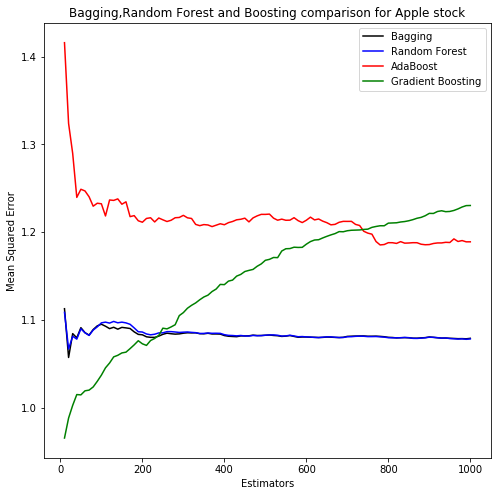

In [5]:
random_state = 42
n_jobs = 5
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)

start = datetime.datetime(2006,1,1)
end = datetime.datetime(2019,1,1)
amzn = create_lagged_series('AAPL',start,end,lags=3)
amzn.dropna(inplace = True)

X = amzn[['Lag1','Lag2','Lag3']]
Y = amzn['Today']

x = scale(X)
y = scale(Y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = random_state)

estimators = np.zeros(axis_step)
bagging_mse = np.zeros (axis_step)
rf_mse = np.zeros (axis_step)
boosting_mse = np.zeros (axis_step)
gradient_mse = np.zeros (axis_step)

for i in range(0,axis_step):
    print('Bagging Estimators : %d of %d' % (step_factor * (i+1),n_estimators))
    bagging = BaggingRegressor(DecisionTreeRegressor(),n_estimators = step_factor * (i+1),n_jobs=n_jobs,random_state=random_state)
    bagging.fit(x_train,y_train)
    mse = mean_squared_error(y_test,bagging.predict(x_test))
    estimators[i] = step_factor *(i+1)
    bagging_mse[i] = mse
    
for i in range(0,axis_step):
    print('Random Forest Estimators : %d of %d' % (step_factor * (i+1),n_estimators))
    rf = RandomForestRegressor(n_estimators = step_factor * (i+1),n_jobs=n_jobs,random_state=random_state)
    rf.fit(x_train,y_train)
    mse = mean_squared_error(y_test,rf.predict(x_test))
    estimators[i] = step_factor *(i+1)
    rf_mse[i] = mse
    
for i in range(0,axis_step):
    print('Boosting Estimators : %d of %d' % (step_factor * (i+1),n_estimators))
    boosting = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators = step_factor * (i+1),random_state=random_state)
    boosting.fit(x_train,y_train)
    mse = mean_squared_error(y_test,boosting.predict(x_test))
    estimators[i] = step_factor *(i+1)
    boosting_mse[i] = mse
    
for i in range(0,axis_step):
    print('Boosting Estimators : %d of %d' % (step_factor * (i+1),n_estimators))
    gradient = GradientBoostingRegressor(loss='ls',n_estimators = step_factor * (i+1),random_state=random_state)
    gradient.fit(x_train,y_train)
    mse = mean_squared_error(y_test,gradient.predict(x_test))
    estimators[i] = step_factor *(i+1)
    gradient_mse[i] = mse
    
    
plt.figure(figsize =(8,8))
plt.title('Bagging,Random Forest and Boosting comparison for Apple stock')
plt.plot(estimators,bagging_mse,'b-',color = 'black',label = 'Bagging')
plt.plot(estimators,rf_mse,'b-',color ='blue',label = 'Random Forest')
plt.plot(estimators,boosting_mse,'b-',color ='red',label = 'AdaBoost')
plt.plot(estimators,gradient_mse,'b-',color ='green',label = 'Gradient Boosting')
plt.legend(loc = 'best')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

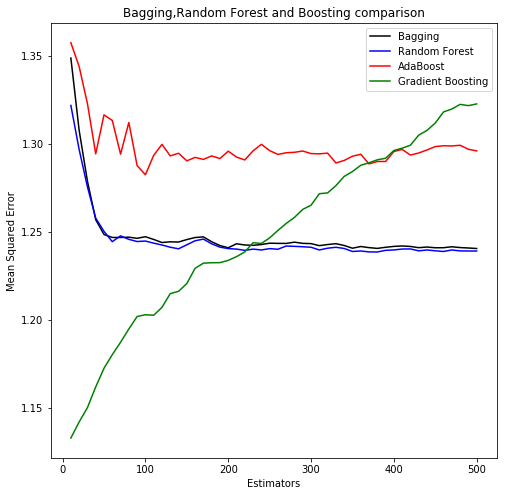

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize =(8,8))
plt.title('Bagging,Random Forest and Boosting comparison')
plt.plot(estimators,bagging_mse,'b-',color = 'black',label = 'Bagging')
plt.plot(estimators,rf_mse,'b-',color ='blue',label = 'Random Forest')
plt.plot(estimators,boosting_mse,'b-',color ='red',label = 'AdaBoost')
plt.plot(estimators,gradient_mse,'b-',color ='green',label = 'Gradient Boosting')
plt.legend(loc = 'best')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()
plt.savefig('abc')

G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence

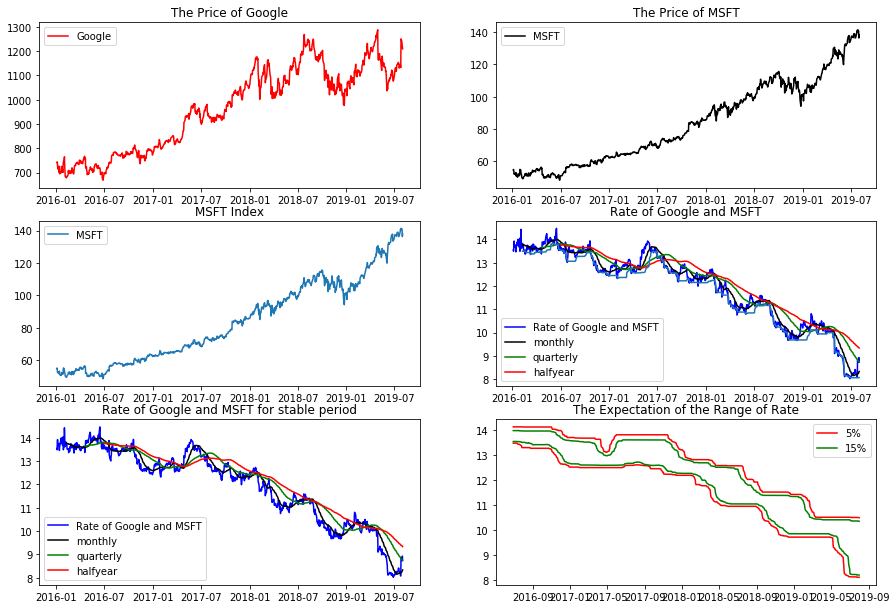

In [2]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np

symbol = 'WIKI/AAPL'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')
MSFT = web.get_data_yahoo('MSFT')


fig = plt.figure(figsize = (15,14))
a = fig.add_subplot(4,2,1)
b = fig.add_subplot(4,2,2)
c = fig.add_subplot(4,2,3)
d = fig.add_subplot(4,2,4)
e = fig.add_subplot(4,2,5)
f = fig.add_subplot(4,2,6)
#g = fig.add_subplot(4,2,7)

GOOG['Close'] = GOOG['Close']['2016-01-04':]
AAPL['Close'] = AAPL['Close']['2016-01-04':]
MSFT['Close'] = MSFT['Close']['2016-01-04':]
INPX['Close'] = INPX['Close']['2016-05-04':]


a.plot(GOOG['Close'],color = 'r')
b.plot(MSFT['Close'],color = 'black')
c.plot(MSFT['Close'])
c.plot(y = 15000)

rate = GOOG['Close']/MSFT['Close']
d.plot(rate,color = 'blue')
d.plot(rate.rolling(25).mean(),color = 'black')
d.plot(rate.rolling(75).mean(),color = 'green')
d.plot(rate.rolling(125).mean(),color = 'red')
d.plot(rate.rolling(25).apply(lambda x : np.percentile(x,5)))

GOOG['Close'] = GOOG['Close']['2016-01-04':]
rate = GOOG['Close']/MSFT['Close']
e.plot(rate,color = 'blue')
e.plot(rate.rolling(25).mean(),color = 'black')
e.plot(rate.rolling(75).mean(),color = 'green')
e.plot(rate.rolling(125).mean(),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,5)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,15)),color = 'green')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,95)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,85)),color = 'green')

a.legend(['Google'])
b.legend (['MSFT'])
c.legend (['MSFT'])
d.legend(['Rate of Google and MSFT','monthly','quarterly','halfyear'])
e.legend(['Rate of Google and MSFT','monthly','quarterly','halfyear'])
f.legend(['5%','15%'])

a.title.set_text('The Price of Google')
b.title.set_text('The Price of MSFT')
c.title.set_text('MSFT Index')
d.title.set_text('Rate of Google and MSFT')
e.title.set_text('Rate of Google and MSFT for stable period')
f.title.set_text('The Expectation of the Range of Rate')
#plt.savefig('C:\Users\Administrator\Desktop\info.png')
#plt.savefig('C:\Users\Administrator\Desktop','googleVSapple')
plt.show()

In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np

symbol = 'WIKI/AAPL'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2013, 1, 27)
#f = web.DataReader('F', ‘yahoo’, start, end)
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')
MSFT = web.get_data_yahoo('MSFT')


fig = plt.figure(figsize = (15,14))
a = fig.add_subplot(4,2,1)
b = fig.add_subplot(4,2,2)
c = fig.add_subplot(4,2,3)
d = fig.add_subplot(4,2,4)
e = fig.add_subplot(4,2,5)
f = fig.add_subplot(4,2,6)
#g = fig.add_subplot(4,2,7)

GOOG['Close'] = GOOG['Close']['2016-01-04':]
AAPL['Close'] = AAPL['Close']['2016-01-04':]
MSFT['Close'] = MSFT['Close']['2016-01-04':]
INPX['Close'] = INPX['Close']['2016-05-04':]


a.plot(GOOG['Close'],color = 'r')
b.plot(MSFT['Close'],color = 'black')
c.plot(MSFT['Close'])
c.plot(y = 15000)

rate = GOOG['Close']/MSFT['Close']
d.plot(rate,color = 'blue')
d.plot(rate.rolling(25).mean(),color = 'black')
d.plot(rate.rolling(75).mean(),color = 'green')
d.plot(rate.rolling(125).mean(),color = 'red')
d.plot(rate.rolling(25).apply(lambda x : np.percentile(x,5)))

GOOG['Close'] = GOOG['Close']['2016-01-04':]
rate = GOOG['Close']/MSFT['Close']
e.plot(rate,color = 'blue')
e.plot(rate.rolling(25).mean(),color = 'black')
e.plot(rate.rolling(75).mean(),color = 'green')
e.plot(rate.rolling(125).mean(),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,5)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,15)),color = 'green')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,95)),color = 'red')
f.plot(rate.rolling(125).apply(lambda x : np.percentile(x,85)),color = 'green')

a.legend(['Google'])
b.legend (['MSFT'])
c.legend (['MSFT'])
d.legend(['Rate of Google and MSFT','monthly','quarterly','halfyear'])
e.legend(['Rate of Google and MSFT','monthly','quarterly','halfyear'])
f.legend(['5%','15%'])

a.title.set_text('The Price of Google')
b.title.set_text('The Price of MSFT')
c.title.set_text('MSFT Index')
d.title.set_text('Rate of Google and MSFT')
e.title.set_text('Rate of Google and MSFT for stable period')
f.title.set_text('The Expectation of the Range of Rate')
#plt.savefig('C:\Users\Administrator\Desktop\info.png')
#plt.savefig('C:\Users\Administrator\Desktop','googleVSapple')
plt.show()

G:\application\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this w

<Figure size 1500x1400 with 6 Axes>

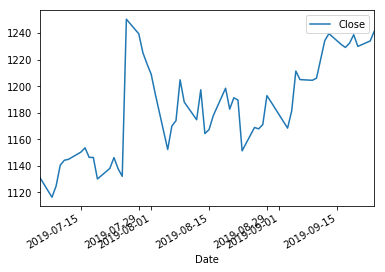

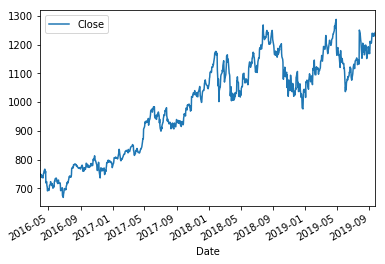

In [16]:
GOOG[['Close']]['2019-07-04':].plot()
GOOG[['Close']]['2016-04-01':].plot()

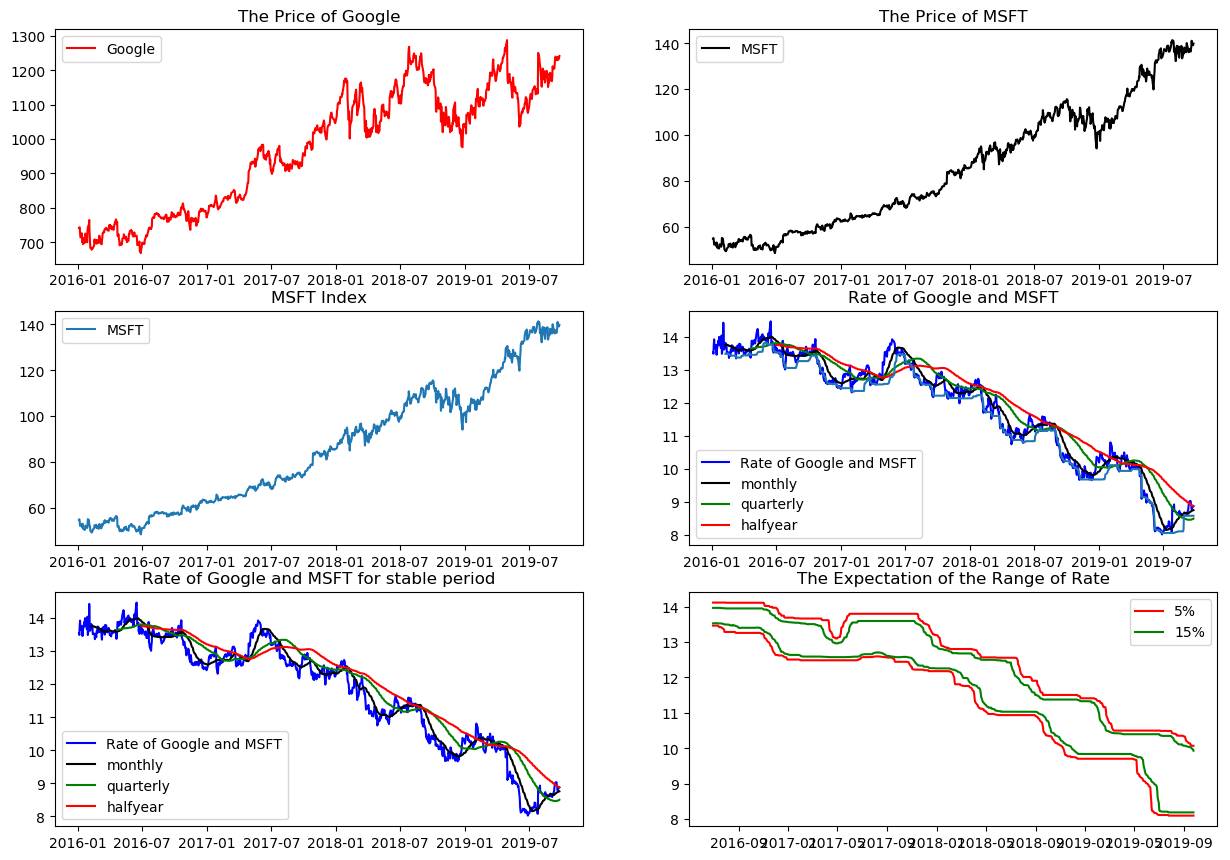

In [3]:
fig